In [2]:
import requests
import json

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import openweathermapy.core as owm

from config import api_key
from config import gkey
from pprint import pprint
import datetime

In [3]:
#Read all the Weather csv files 
main = "Resources/Indoor_Outdoor_Weather - main.csv"
main_df = pd.read_csv(main, encoding="ISO-8859-1")
Atmosphere = "Resources/Indoor_Outdoor_Weather - Atmosphere.csv"
atmosphere_df = pd.read_csv(Atmosphere, encoding="ISO-8859-1")
Drizzle= "Resources/Indoor_Outdoor_Weather - Drizzle.csv"
drizzle_df = pd.read_csv(Drizzle, encoding="ISO-8859-1")
Rain = "Resources/Indoor_Outdoor_Weather - Rain.csv"
rain_df = pd.read_csv(Rain, encoding="ISO-8859-1")
Snow ="Resources/Indoor_Outdoor_Weather - Snow.csv"
snow_df = pd.read_csv(Snow, encoding="ISO-8859-1")

#https://developers.google.com/places/web-service/supported_types
#Read all the activities files
Acty_In = pd.read_excel("Resources/Indoor.xlsx")
Acty_Out = pd.read_excel("Resources/Outdoor.xlsx")
Acty_EveIn = pd.read_excel("Resources/EveIndoor.xlsx")
Acty_EveInOut = pd.read_excel("Resources/EveInOut.xlsx")
Acty_NightIn = pd.read_excel("Resources/NightIndoor.xlsx")
Acty_NightInOut = pd.read_excel("Resources/NightInOut.xlsx")

In [4]:
#Converting the actvity dataframes into list
Acty_Inlist = Acty_In["Indoor"].tolist()
Acty_Outlist = Acty_Out["Outdoor"].tolist()
Acty_EveInlist = Acty_EveIn["EveIndoor"].tolist()
Acty_EveInOutlist = Acty_EveInOut["EveInOut"].tolist()
Acty_NightInlist = Acty_NightIn["NightIndoor"].tolist()
Acty_NightInOutlist = Acty_NightInOut["NightInOut"].tolist()

In [5]:
#Input the target city and state
target_city = input("Enter city & state in the format 'city,state: ")

Enter city & state in the format 'city,state: Sayreville, NJ


In [6]:
#Split the input to get the city
City = target_city.split(",")[0]

#Create settings dictionary for units & appid
settings = {"units": "metric", "appid": api_key}

In [7]:
#Get current weather
current_weather = owm.get_current(City, **settings)
#print(f"Current weather object: {current_weather}.")

#Get weather forecast
#forecast_weather = owm.get_forecast_hourly(City, **settings)
#pprint(forecast_weather)

summary = ["name", 'weather', "main", "wind", 'clouds']
data = current_weather(*summary)
#print(f"The current weather summary is : {data}.")

currentmain = data[1][0]["main"]
#print (currentmain)

temp = data[2]['temp']
#print (temp)

humidity = data[2]['humidity']
#print (humidity)

windspeed = data[3]["speed"]
#print(windspeed)

currentdesc = data[1][0]['description']
#print (currentdesc)

In [10]:
Finalresult = ""
Words_of_advice = " "
 
# loop through main weather types to determine if outdoor or indoor activities
if (currentmain=="Thunderstorms") or (currentmain=="Clouds") or (currentmain=="Clear") or (currentmain=="Mist"):
    if (currentmain=="Thunderstorms"):
        print(f'Staysafe!!! {currentmain} in the {City}')
        Words_of_advice = "Staysafe!!! "+ currentmain + " in the " + City
        #print(Words_of_advice)
        Finalresult="indoor"
        print(Finalresult)
    else:
        Finalresult="outdoor"
        print(Finalresult)
else:
    if currentmain=="Rain":
    #read rain.df to find which
        for index, desctype in rain_df.iterrows():
            if currentdesc == desctype["Description"]:
                Finalresult=rain_df["Rating"][index]
                print(Finalresult)
    elif currentmain=="Snow" :
        #read snow.df to find which
        for index, desctype in snow_df.iterrows():
            if currentdesc == desctype["Description"]:
                Finalresult=desctype["Rating"][index]
                print(Finalresult)
    elif currentmain=="Drizzle" :
        #read drizzledf to find which
        for index, desctype in drizzle_df.iterrrows():
            if currentdesc == desctype["Description"]:
                Finalresult=drizzle_df["Rating"][index]
                print(Finalresult)
    elif currentmain=="Atmosphere" :
        #read atmospheredf to find which
        for index, desctype in atmosphere_df.iterrows():
            if currentdesc== desctype["Description"]:
                Finalresult=atmosphere_df["Rating"][index]
                print(Finalresult)
if Finalresult == "outdoor" or " ":
    #if(currentmain=="Clouds") or (currentmain=="Clear") or (currentmain=="Mist"):
    if  (temp<7 or temp>35):
        print(f'Better to be safe inside as it is extreme temperature {temp} outside in {City}')
        Words_of_advice = "Better to be safe inside as it is extreme temperature" + str(temp) + " outside in " + City
        #print(Words_of_advice)
        Finalresult="indoor"
        print(Finalresult)
    elif(windspeed>38):
        #https://en.wikipedia.org/wiki/Beaufort_scale
        print(f'Better to be safe inside as it is windy ({windspeed}) outside in {City}')
        Words_of_advice = "Better to be safe inside as it is windy " + str(windspeed) + " outside in " + City
        #print(Words_of_advice)
        Finalresult="indoor"
        print(Finalresult)
    elif(humidity>60): 
        print(f'Better to be inside as it is quite humid ({humidity}) outside in {City}')
        Words_of_advice  = "Better to be indoors as it is quite humid " + str(humidity) + " outside in " + City
        #print(Words_of_advice)
        Finalresult="indoor" 
        print(Finalresult)
    else:
        print(f'It is safe & pleasant!!! Enjoy outside in the current weather of {currentmain} sky in {City}')
        Words_of_advice = "It is safe & pleasant!!! Enjoy outside in the current weather of "+ currentmain +" in "+ City
        #print(Words_of_advice)
        Finalresult="outdoor"
        print(Finalresult)
#print (finalresult)

Better to be inside as it is quite humid (94) outside in Sayreville
indoor


In [11]:
now = datetime.datetime.now()
print(now)
At12= now.replace(hour=12, minute=0, second=0, microsecond=0)
At15 = now.replace(hour=15, minute=0, second=0, microsecond=0)
At18 = now.replace(hour=18, minute=0, second=0, microsecond=0)
At21 = now.replace(hour=21, minute=0, second=0, microsecond=0)

2018-07-06 08:39:35.313370


In [12]:
Acty = Finalresult
if (Acty == "outdoor"):
    if(now < At12):
        print(Words_of_advice)
        print("It's morning, plan outdoor activities for the entire day")
        Acty = Acty_Outlist
    elif((now >= At12 and now < At15)):
        print(Words_of_advice)
        print("It's afternoon, plan outdoor activities for the day")
        Acty = Acty_Outlist
    elif((now >= At15 and now < At18)):
        print(Words_of_advice)
        print("It's evening, though you can go outdoor,however, we would suggest indoor activities for the evening as parks,zoos might be closed. We would add stadiums though, as there might be matches and campgrounds if you are adventurous!!!")
        Acty = Acty_EveInOutlist
    elif((now >= At18)):
        print(Words_of_advice)
        print("It's lovely night, though you can go outdoor,however, we would recommend indoor activities for the night,as parks,zoos are closed. We would add stadiums though, as there might be matches and campgrounds if you are adventurous!!!")
        Acty = Acty_NightInOutlist 
elif (Acty == "indoor"):        
    if(now < At12):
        print(Words_of_advice)
        print("It's morning, plan indoor activities for the entire day or stay at home & relax.")
        Acty = Acty_Inlist
    elif((now >= At12 and now < At15)):
        print(Words_of_advice)
        print("It's afternoon, plan indoor activities for the day or stay at home & relax.")
        Acty = Acty_Inlist
    elif((now >= At15 and now < At18)):
        print(Words_of_advice)
        print("It's evening, plan indoor activities for the evening or stay at home & relax.")
        Acty = Acty_EveInlist 
    elif((now >= At18)):
        print(Words_of_advice)
        print("It's night, plan indoor activities for the night or stay at home & relax.")
        Acty = Acty_NightInlist 

Better to be indoors as it is quite humid 94 outside in Sayreville
It's morning, plan indoor activities for the entire day or stay at home & relax.


In [13]:
#Google Maps API
base_url = "https://maps.googleapis.com/maps/api/geocode/json"

#Creating the params dict with address and key
params = {"address": target_city, "key": gkey}

In [14]:
# Run request (Build URL using the base_url & params)
response = requests.get(base_url, params=params)
#print(response.url)

# Convert the response to JSON
city_geo = response.json()

# Extract Lat/Lng
lat = city_geo["results"][0]["geometry"]["location"]["lat"]
lng = city_geo["results"][0]["geometry"]["location"]["lng"]

# Print results
print("%s: %s, %s" % (target_city, lat, lng))

#Converting the lat & lng to string
lat = str(lat)
lng = str(lng)

Sayreville, NJ: 40.45940210000001, -74.360846


In [15]:
#Google maps nearby places search API
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json?"

places_url = "https://maps.googleapis.com/maps/api/place/findplacefromtext/json?"

In [16]:
#Find the names and addresses of nearbyplaces in given city,state entered by the
#user.

type_of_place = []
place_names = []
addresses = []
rating = []
openorclose = []
for i in range(len(Acty)):
    
    target_type = Acty[i]
    radius = 50000

# Build URL using the Google Maps API and other fields
    target_url = base_url+"key="+gkey+"&location="+lat+","+lng+"&radius="+str(radius)+"&type="+target_type
    #target_url = base_url+"key="+gkey+"&location="+lat+","+lng+"&rankby=distance"+"&type="+target_type

# Run request
    response = requests.get(target_url)
    city_placestogo = response.json()
   
    if city_placestogo["status"] == "ZERO_RESULTS":
        print(f'{Acty[i].upper()} : No {Acty[i]} near your place of choice.')
        type_of_place.append(target_type)
        place_names.append("Not Available ")
        addresses.append("Not Available ")
        rating.append("Not Available ")
        openorclose.append("Not Available ")
        print("\n")
    else:
        print(f'{Acty[i].upper()} : Bingo!!! We have found good {Acty[i]}s near your place of choice.')
        count = 0
        for item in city_placestogo["results"]:
            myplace = item["name"]
            myplace = myplace.replace(" ", "%20")
            target_url = places_url+"key="+gkey+"&input="+myplace+"&inputtype=textquery"+"&fields=formatted_address,name,rating,opening_hours"
            response = requests.get(target_url)
            data = response.json()
            type_of_place.append(target_type)
            try:
                place_names.append(data["candidates"][0]["name"])
            except:
                place_names.append(item["name"])
            try:    
                addresses.append(data["candidates"][0]["formatted_address"])
            except:
                addresses.append(item["vicinity"])
            try:    
                rating.append(data["candidates"][0]["rating"])
            except:   
                rating.append(np.nan)
            try:  
                if(data["candidates"][0]["opening_hours"]["open_now"]):
                    openorclose_status = "Open"
                else:
                    openorclose_status = "Closed"
                openorclose.append(openorclose_status)
            except:
                openorclose.append("Check the opening hours on the website")
            count = count + 1
        print(f'Total {count} {Acty[i]}s are found near {City}')
        print("\n")    

AQUARIUM : Bingo!!! We have found good aquariums near your place of choice.
Total 20 aquariums are found near Sayreville


ART_GALLERY : Bingo!!! We have found good art_gallerys near your place of choice.
Total 20 art_gallerys are found near Sayreville


BAKERY : Bingo!!! We have found good bakerys near your place of choice.
Total 20 bakerys are found near Sayreville


BAR : Bingo!!! We have found good bars near your place of choice.
Total 20 bars are found near Sayreville


BOOK_STORE : Bingo!!! We have found good book_stores near your place of choice.
Total 20 book_stores are found near Sayreville


BOWLING_ALLEY : Bingo!!! We have found good bowling_alleys near your place of choice.
Total 20 bowling_alleys are found near Sayreville


CAFE : Bingo!!! We have found good cafes near your place of choice.
Total 20 cafes are found near Sayreville


CASINO : Bingo!!! We have found good casinos near your place of choice.
Total 19 casinos are found near Sayreville


FLORIST : Bingo!!! We hav

In [22]:
Df = pd.DataFrame({"Type":type_of_place,"Place":place_names,"Address":addresses, 
                   "Rating":rating,
                  "OpenorClose":openorclose})
Df.fillna(0, inplace=True)
Df_sorted = Df.sort_values(by=["Type"])
#Df_sorted = Df.sort_values(by=["Rating"],ascending=False)
Df_sorted[["Type","Place","Address","Rating","OpenorClose"]]

,Type,Place,Address,Rating,OpenorClose
0,aquarium,New York Aquarium,"602 Surf Ave, Brooklyn, NY 11224, USA",3.9,Closed
19,aquarium,1st Class Aquarium,"1167 Bay St, Staten Island, NY 10305, USA",4.4,Closed
18,aquarium,Aqua Vim Corporation,"54-08 46th St, Maspeth, NY 11378, USA",4.5,Closed
17,aquarium,Aquapro Aquariums,"123 Lenox Street, Newark",0.0,Check the opening hours on the website
16,aquarium,Aquarium Architecture,"521 5th Avenue, New York",0.0,Check the opening hours on the website
15,aquarium,Reef Junkie LLC,"443 Joralemon Street #3, Belleville",0.0,Check the opening hours on the website
13,aquarium,Tamco Aquarium,"6310 Bay Pkwy, Brooklyn, NY 11204, USA",4.2,Closed
12,aquarium,David's Aquariums,"2 Colony Dr E, West Orange, NJ 07052, USA",0.0,Check the opening hours on the website
11,aquarium,The Ancient Mariners,"209 Lake Avenue, Trenton",0.0,Check the opening hours on the website
10,aquarium,David's Aquariums,"2 Colony Dr E, West Orange, NJ 07052, USA",0.0,Check the opening hours on the website


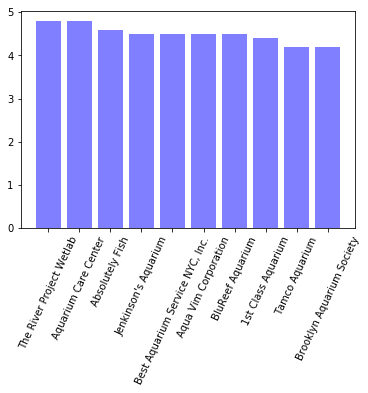

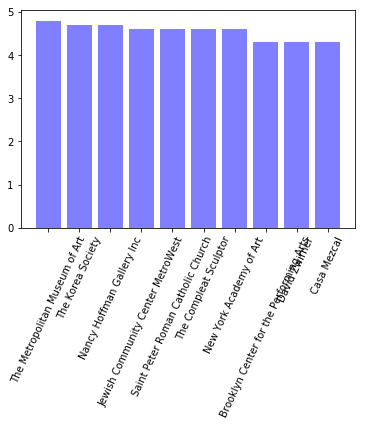

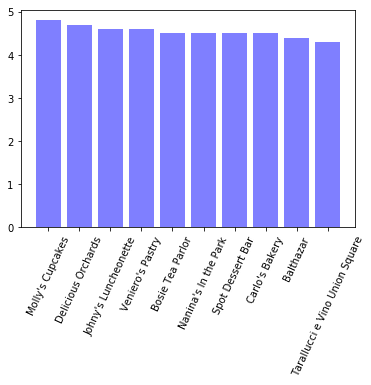

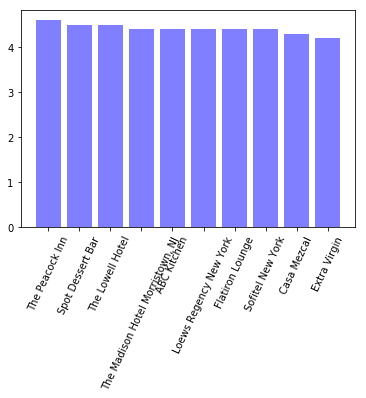

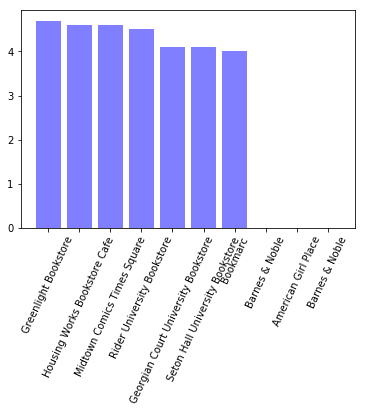

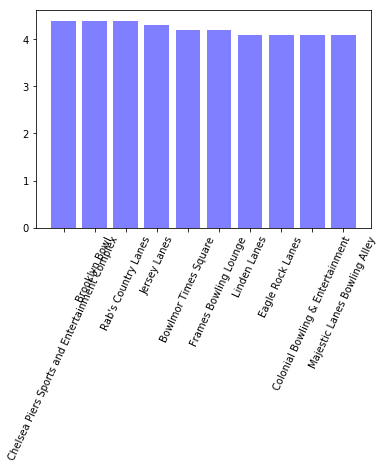

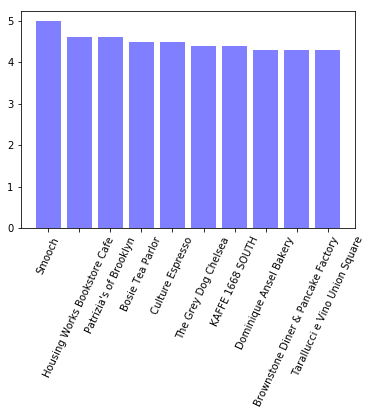

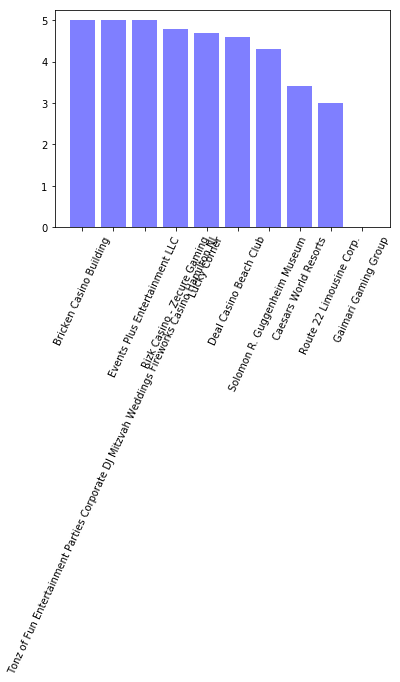

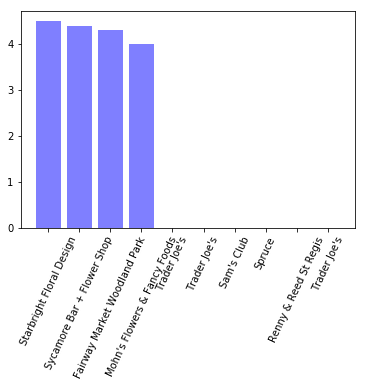

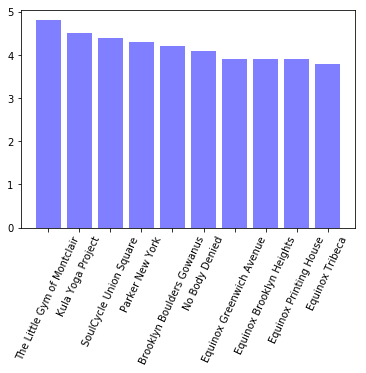

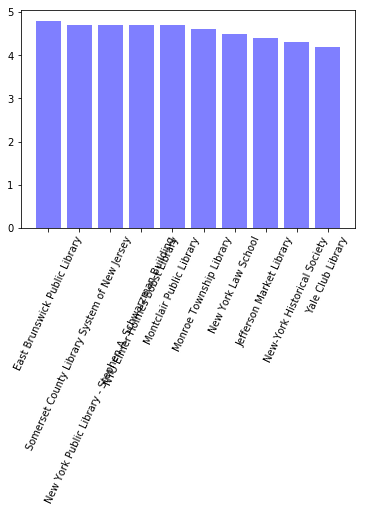

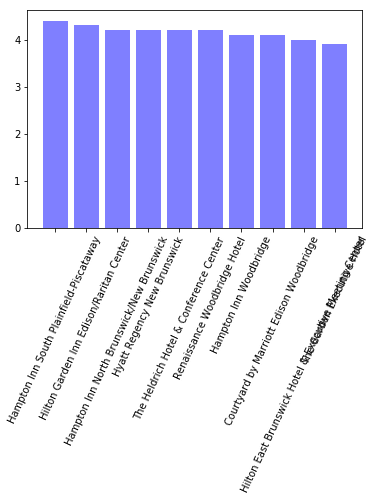

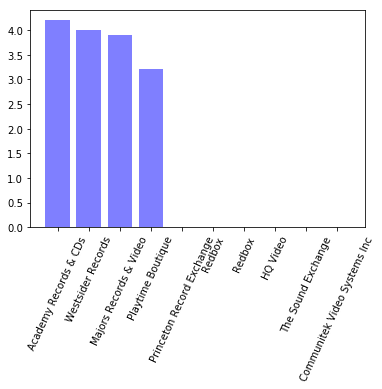

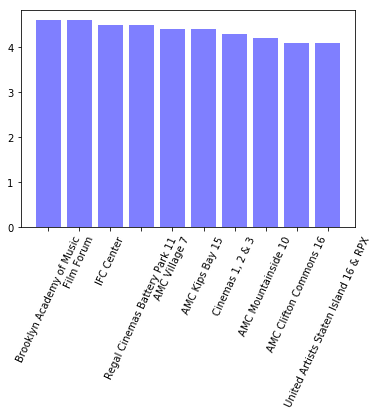

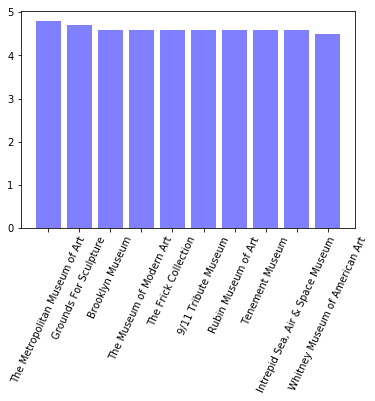

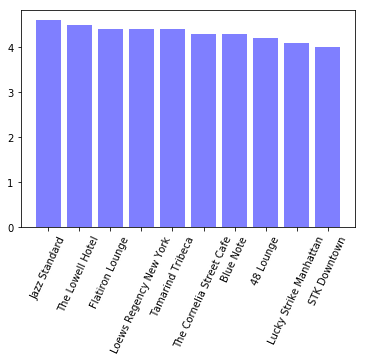

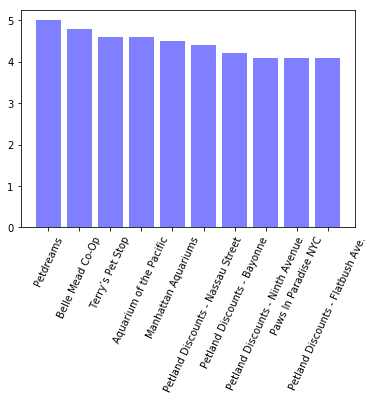

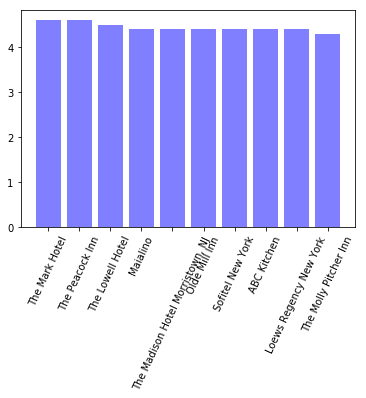

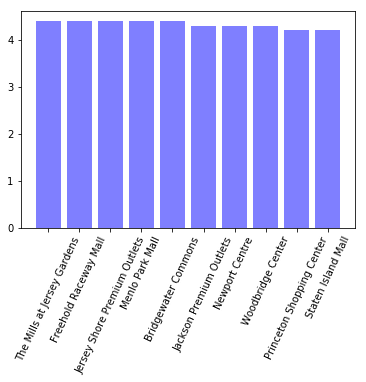

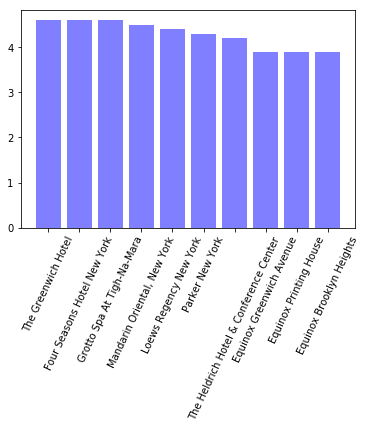

                                             Address  \
380        377 Greenwich St, New York, NY 10013, USA   
384            57 E 57th St, New York, NY 10022, USA   
391   1155 Resort Dr, Parksville, BC V9P 2E3, Canada   
383         80 Columbus Cir, New York, NY 10023, USA   
385            540 Park Ave, New York, NY 10065, USA   
382           119 W 56th St, New York, NY 10019, USA   
379  10 Livingston Ave, New Brunswick, NJ 08901, USA   
392        97 Greenwich Ave, New York, NY 10014, USA   
389           421 Hudson St, New York, NY 10014, USA   
387        194 Joralemon St, Brooklyn, NY 11201, USA   

                                OpenorClose  \
380  Check the opening hours on the website   
384                                    Open   
391                                  Closed   
383                                    Open   
385                                    Open   
382                                    Open   
379  Check the opening hours on the website   
392    

In [33]:
for acty in Acty:
    Df_A = Df[Df["Type"] == acty]
    Df_A = Df_A.sort_values(by=["Rating"],ascending=False)
    Df_A = Df_A[:10]
    x_axis = np.arange(len(Df_A["Place"]))
    plt.bar(x_axis, Df_A["Rating"],color="b",alpha = 0.5)
    plt.xticks(x_axis, Df_A["Place"],rotation=65)
    plt.show()
print(Df_A)    

In [88]:
Dfnew = Df.reset_index()
Dfnew = Dfnew.set_index("Type")
Dfnew = Dfnew.drop("index", axis=1)
Dfnew

,Address,OpenorClose,Place,Rating
Type,,,,
bar,"481 Eighth Ave, New York, NY 10001, USA",Open,Tick Tock Diner NY,3.6
bar,"45 W 44th St, New York, NY 10036, USA",Open,Sofitel New York,4.4
bar,"130 E 39th St, New York, NY 10016, USA",Open,The Court - A St Giles Hotel,3.7
bar,"New York 12534, USA",Check the opening hours on the website,Hudson,0.0
bar,"501 Lexington Ave, New York, NY 10017, USA",Open,Roger Smith Hotel,4.2
bar,"44 W 63rd St, New York, NY 10023, USA",Open,The Empire Hotel,3.9
bar,"540 Park Ave, New York, NY 10065, USA",Open,Loews Regency New York,4.4
bar,"28 East 63rd Street, at Madison Ave, New York,...",Open,The Lowell Hotel,4.5
bar,"2688 Broadway, New York, NY 10025, USA",Open,Marrakech Hotel-NYC,3.3


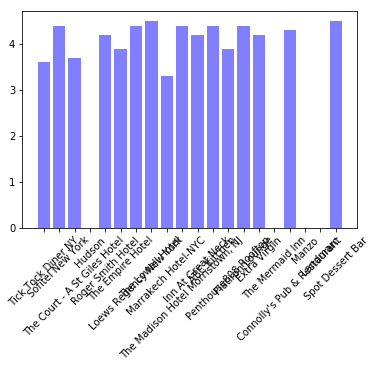

In [85]:
Df.fillna(0, inplace=True)
Df1 = Df[Df["Type"] == "bar"]
x_axis = np.arange(len(Df1["Place"]))
#print(x_axis)
# x_ticks = Df1["Place"]
# x_ticks

# Y = [1.2,3.4,5.6,7.8,0.0,1.2,6.3,2.8,1.1,7]
plt.bar(x_axis, Df1["Rating"],color="b",alpha = 0.5,align="center")
plt.xticks(x_axis, Df1["Place"],rotation=45)
plt.show()
#en(Df1["Rating"])


In [23]:
Df.fillna(0, inplace=True)

dict={}

for item in Acty:
    item_Df = Df[Df["Type"]==item].reset_index()
    item_Df = item_Df.drop("index",1)       
    dict[item] = item_Df
    print(type(dict[item]))
    print(dict[item][["Place","Rating"]])
    print(dict[item]["Place"]) 


<class 'pandas.core.frame.DataFrame'>
                               Place  Rating
0                 Tick Tock Diner NY     3.6
1                   Sofitel New York     4.4
2       The Court - A St Giles Hotel     3.7
3                             Hudson     0.0
4                  Roger Smith Hotel     4.2
5                   The Empire Hotel     3.9
6             Loews Regency New York     4.4
7                   The Lowell Hotel     4.5
8                Marrakech Hotel-NYC     3.3
9   The Madison Hotel Morristown, NJ     4.4
10                 Inn At Great Neck     4.2
11                       ABC Kitchen     4.4
12              Penthouse808 Rooftop     3.9
13                   Flatiron Lounge     4.4
14                      Extra Virgin     4.2
15                   The Mermaid Inn     0.0
16       Connolly's Pub & Restaurant     4.3
17                             Manzo     0.0
18                          Landmarc     0.0
19                  Spot Dessert Bar     4.5
0                